In [99]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [100]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


In [101]:
club1 = [n for n in G.nodes() if G.node[n]['club']=='Mr. Hi']
club2 = [n for n in G.nodes() if G.node[n]['club']!='Mr. Hi']

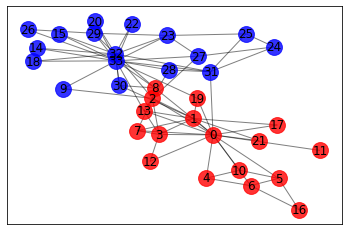

In [148]:
pos=nx.spring_layout(G);

nx.draw_networkx_nodes(G,pos,
                       nodelist=club1,
                       node_color='r',
                       node_size=250,
                       alpha=0.8);
nx.draw_networkx_nodes(G,pos,
                       nodelist=club2,
                       node_color='b',
                       node_size=250,
                       alpha=0.8);


nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5);
nx.draw_networkx_labels(G,pos);

In [103]:
### Generate Random Walks

In [113]:
## Hyperparameters
walk_length = # Length of each walk sequence
walks_per_node = # Number of walks per node in graph

In [114]:
walks = []
for node in G:
    for i in range(walks_per_node):
        # Start walk at each node
        walk = [str(node)]
        current_node = node
        while len(walk) < walk_length:
            # Randomly choose a neighbor
            node_neighbors = list(G.neighbors(current_node))
            next_node = random.choice(node_neighbors)
            # Add neighbor to walk
            walk.append(str(next_node))
            # Move to neighbor and repeat
            current_node = next_node
        walks.append(walk)

In [115]:
walks[0:10]

[['0',
  '2',
  '13',
  '2',
  '0',
  '10',
  '4',
  '6',
  '5',
  '16',
  '6',
  '16',
  '6',
  '5',
  '10',
  '0',
  '8',
  '30',
  '8',
  '30',
  '32',
  '18',
  '32',
  '14',
  '33',
  '26',
  '33',
  '18',
  '32',
  '8',
  '32',
  '15',
  '33',
  '27',
  '23',
  '29',
  '23',
  '33',
  '27',
  '24',
  '25',
  '31',
  '0',
  '1',
  '2',
  '3',
  '12',
  '3',
  '12',
  '3',
  '12',
  '0',
  '6',
  '4',
  '6',
  '16',
  '6',
  '5',
  '16',
  '5',
  '10',
  '0',
  '13',
  '33',
  '23',
  '33',
  '8',
  '30',
  '1',
  '0',
  '19',
  '0',
  '6',
  '0',
  '2',
  '13',
  '33',
  '13',
  '1',
  '19'],
 ['0',
  '13',
  '3',
  '7',
  '2',
  '13',
  '33',
  '13',
  '3',
  '0',
  '12',
  '0',
  '4',
  '6',
  '4',
  '0',
  '3',
  '7',
  '2',
  '27',
  '2',
  '3',
  '13',
  '2',
  '3',
  '13',
  '3',
  '0',
  '11',
  '0',
  '1',
  '17',
  '1',
  '2',
  '7',
  '1',
  '17',
  '1',
  '3',
  '0',
  '17',
  '1',
  '7',
  '2',
  '0',
  '13',
  '0',
  '12',
  '3',
  '13',
  '33',
  '23',
  '32',
  '8',

In [116]:
### Train SkipGram Model

In [137]:
## Hyperparameters
negative_sample_exponent = # these numbers can be between -1 and 1
embedding_dimension = # Dimensionality of the low dimensional representations
context_window = # Number of neighbors in the context window
number_negative_samples = # Number of negative samples

In [138]:
model = Word2Vec(walks, 
                 size=embedding_dimension, 
                 window=context_window, 
                 sg=1, hs=0, 
                 negative=number_negative_samples, 
                 ns_exponent=negative_sample_exponent);

In [153]:
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2, perplexity=10)
X_transformed = tsne.fit_transform(X)
df = pd.DataFrame(X_transformed, index=vocab, columns=['x', 'y'])

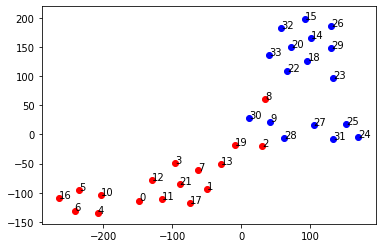

In [154]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in df.iterrows():
    if int(word) in club1:
        pt_color = 'r'
    else:
        pt_color = 'b'
    ax.scatter(pos[0], pos[1], color=pt_color)
    ax.annotate(word, (pos[0], pos[1]))